<a href="https://colab.research.google.com/github/tnwls6865/cau_mAI_tutorial/blob/main/Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Visualize Filters

In [ ]:
import numpy as np 

class TwoLayerNet(object):
  """
  
  input - fully connected layer - ReLU - fully connected layer - softmax

  """

  def __init__(self, input_size, hidden_size, output_size, std=1e-4):
    """

    W1: First layer weights; has shape (D, H)
    b1: First layer biases; has shape (H,)
    W2: Second layer weights; has shape (H, C)
    b2: Second layer biases; has shape (C,)

    Inputs:
    - input_size: The dimension D of the input data.
    - hidden_size: The number of neurons H in the hidden layer.
    - output_size: The number of classes C.
    """
    self.params = {}
    self.params['W1'] = std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = std * np.random.randn(hidden_size)  + 0.5  # np.zeros(hidden_size) 
    self.params['W2'] = std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

  def loss(self, X, y=None, reg=0.0):
    
    W1, b1 = self.params['W1'], self.params['b1']
    W2, b2 = self.params['W2'], self.params['b2']
    N, D = X.shape

    # Compute the forward pass
    scores = None
    #############################################################################
    # TODO: Perform the forward pass, computing the class scores for the input. #
    # Store the result in the scores variable, which should be an array of      #
    # shape (N, C).                                                             #
    #############################################################################
    
    z = np.dot(X, W1) + b1  # (N, num_hidden)
    h = np.maximum(z, 0)    # ReLU
    scores = np.dot(h , W2) + b2 

    if y is None:
      return scores

    # Compute the loss
    loss = 0.0
  
    # compute softmax probabilities
    out = np.exp(scores)      # (N, C)
    out /= np.sum(out, axis=1).reshape(N, 1)
    
    # compute softmax loss
    loss -= np.sum(np.log(out[np.arange(N), y]))
    loss /= N
    loss += 0.5 * reg * (np.sum(W1**2) + np.sum(W2**2))
    
    # Backward pass : gradient계산
    grads = {}

    # back propagation
    dout = np.copy(out)  # (N, C)
    dout[np.arange(N), y] -= 1
    dh = np.dot(dout, W2.T)
    dz = np.dot(dout, W2.T) * (z > 0)  # (N, H)
    
    # compute gradient for parameters
    grads['W2'] = np.dot(h.T, dout) / N      # (H, C)
    grads['b2'] = np.sum(dout, axis=0) / N      # (C,)
    grads['W1'] = np.dot(X.T, dz) / N        # (D, H)
    grads['b1'] = np.sum(dz, axis=0) / N       # (H,)
    
    # add reg term
    grads['W2'] += reg * W2
    grads['W1'] += reg * W1

    return loss, grads

  def train(self, X, y, X_val, y_val,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=1e-5, num_iters=100,
            batch_size=200, verbose=False):
  
    num_train = X.shape[0]
    iterations_per_epoch = max(num_train / batch_size, 1)

    # Use SGD to optimize the parameters in self.model
    loss_history = []
    train_acc_history = []
    val_acc_history = []

    for it in range(num_iters):
      X_batch = None
      y_batch = None
        
      random_idxs = np.random.choice(num_train, batch_size)
      X_batch = X[random_idxs]
      y_batch = y[random_idxs]
    
      # Compute loss and gradients using the current minibatch
      loss, grads = self.loss(X_batch, y=y_batch, reg=reg)
      loss_history.append(loss)

      #########################################################################
      # TODO: Use the gradients in the grads dictionary to update the         #
      # parameters of the network (stored in the dictionary self.params)      #
      # using stochastic gradient descent. You'll need to use the gradients   #
      # stored in the grads dictionary defined above.                         #
      #########################################################################
      
      self.params['W2'] -= learning_rate * grads['W2']
      self.params['b2'] -= learning_rate * grads['b2']
      self.params['W1'] -= learning_rate * grads['W1']
      self.params['b1'] -= learning_rate * grads['b1']
        
      #########################################################################
      #                             END OF YOUR CODE                          #
      #########################################################################

      if verbose and it % 100 == 0:
        print ('iteration %d / %d: loss %f' % (it, num_iters, loss))

      # Every epoch, check train and val accuracy and decay learning rate.
      if it % iterations_per_epoch == 0:
        # Check accuracy
        train_acc = (self.predict(X_batch) == y_batch).mean()
        val_acc = (self.predict(X_val) == y_val).mean()
        train_acc_history.append(train_acc)
        val_acc_history.append(val_acc)

        # Decay learning rate
        learning_rate *= learning_rate_decay

    return {
      'loss_history': loss_history,
      'train_acc_history': train_acc_history,
      'val_acc_history': val_acc_history,
    }

  def predict(self, X):
   
    y_pred = None
    params = self.params
    ###########################################################################
    # TODO: Implement this function; it should be VERY simple!                #
    ###########################################################################
    
    z = np.dot(X, params['W1']) + params['b1']
    h = np.maximum(z, 0)
    out = np.dot(h, params['W2']) + params['b2']
    y_pred = np.argmax(out, axis=1)

    return y_pred


In [ ]:
from keras.datasets import cifar10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    (X_train, y_train) , (X_test, y_test) = cifar10.load_data()
        
    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0).astype('uint8')
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print ('Train data shape: ', X_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Validation data shape: ', X_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', y_test.shape)

170498071/170498071 [==============================] - 11s 0us/step
Train data shape:  (49000, 3072)
Train labels shape:  (49000, 1)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000, 1)
Test data shape:  (1000, 3072)
Test labels shape:  (1000, 1)


In [ ]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train.flatten(), X_val, y_val.flatten(),
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.5, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val.flatten()).mean()
print ('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 2.303064
iteration 100 / 1000: loss 2.302563
iteration 200 / 1000: loss 2.295336
iteration 300 / 1000: loss 2.253369
iteration 400 / 1000: loss 2.170684
iteration 500 / 1000: loss 2.142932
iteration 600 / 1000: loss 2.193410
iteration 700 / 1000: loss 2.156248
iteration 800 / 1000: loss 2.147941
iteration 900 / 1000: loss 2.049522
Validation accuracy:  0.249


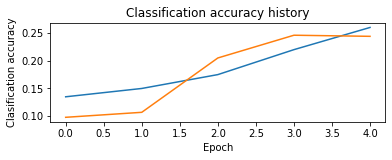

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(2, 1, 1)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

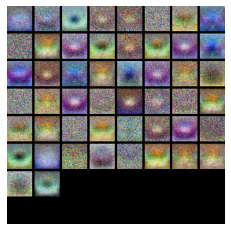

In [ ]:
import math 
def visualize_grid(Xs, ubound=255.0, padding=1):
  """
  Reshape a 4D tensor of image data to a grid for easy visualization.

  Inputs:
  - Xs: Data of shape (N, H, W, C)
  - ubound: Output grid will have values scaled to the range [0, ubound]
  - padding: The number of blank pixels between elements of the grid
  """
  (N, H, W, C) = Xs.shape
  grid_size = int(math.ceil(math.sqrt(N)))
  grid_height = H * grid_size + padding * (grid_size - 1)
  grid_width = W * grid_size + padding * (grid_size - 1)
  grid = np.zeros((grid_height, grid_width, C))
  next_idx = 0
  y0, y1 = 0, H
  for y in range(grid_size):
    x0, x1 = 0, W
    for x in range(grid_size):
      if next_idx < N:
        img = Xs[next_idx]
        low, high = np.min(img), np.max(img)
        grid[y0:y1, x0:x1] = ubound * (img - low) / (high - low)
        # grid[y0:y1, x0:x1] = Xs[next_idx]
        next_idx += 1
      x0 += W + padding
      x1 += W + padding
    y0 += H + padding
    y1 += H + padding
  # grid_max = np.max(grid)
  # grid_min = np.min(grid)
  # grid = ubound * (grid - grid_min) / (grid_max - grid_min)
  return grid

# Visualize the weights of the network

def show_net_weights(net):
  W1 = net.params['W1']
  W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
  plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
  plt.gca().axis('off')
  plt.show()

show_net_weights(net)

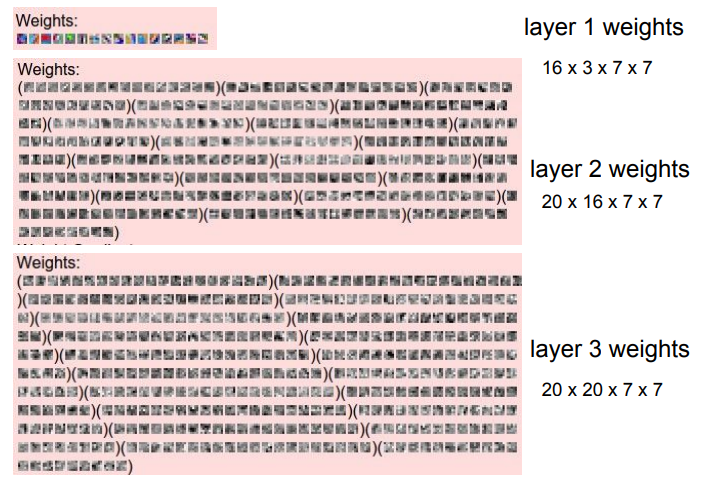

#### Last Layer : Dimensionality Reduction
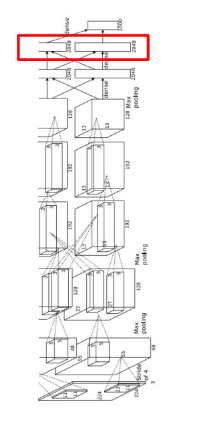

#### t-SNE
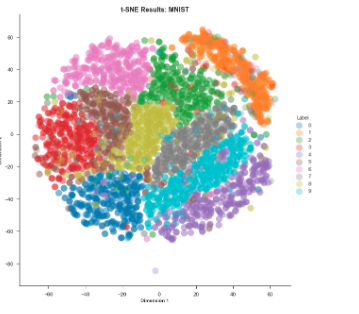

In [ ]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import seaborn as sns
from matplotlib import pyplot as pl

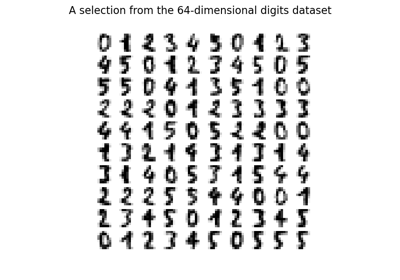

In [ ]:
data = load_digits()

In [ ]:
n_components = 2
model = TSNE(n_components=n_components)
X_embedded = model.fit_transform(data.data)
print(X_embedded[0])

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[47.030052 28.010656]


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


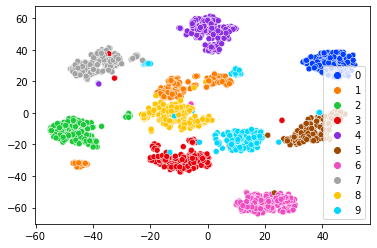

In [ ]:
palette = sns.color_palette("bright", 10)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=data.target, legend='full', palette=palette)
plt.show()

#### Saliency Maps
다른 영역에 비해서 픽셀값의 변화가 급격한 부분을 모아서 매핑한 후에 관심있는 물체를 관심이 없는 배경과 분리시키는 방법

즉, 모델이 분류하는데 있어서 중요하게 생각하는 부분의 픽셀을 강조

Saliency Map은 픽셀값의 변화가 급격한 부분을 모아서 매핑하는데, Gradient Descent를 사용하여서 변화가 큰 부분을 찾아냄

In [ ]:
import cv2
image = cv2.imread('/content/drive/MyDrive/CAU_mAI/boat.jpg')

In [ ]:
saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
(success, saliencyMap) = saliency.computeSaliency(image)

In [ ]:
saliencyMap = (saliencyMap * 255).astype("uint8")

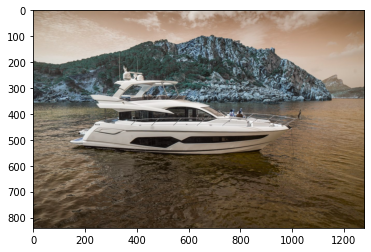

In [ ]:
pl.imshow(image)

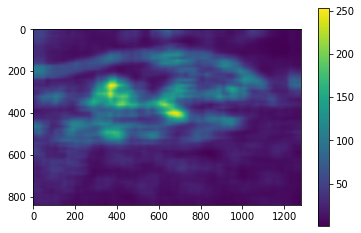

(<matplotlib.image.AxesImage at 0x7fad2626a520>,
 None)

In [ ]:
pl.imshow(saliencyMap),pl.colorbar(),pl.show()

#### Deep Dream 
Rather than synthesizing an image to maximize a specific neuron, instead
try to amplify the neuron activations at some layer in the network


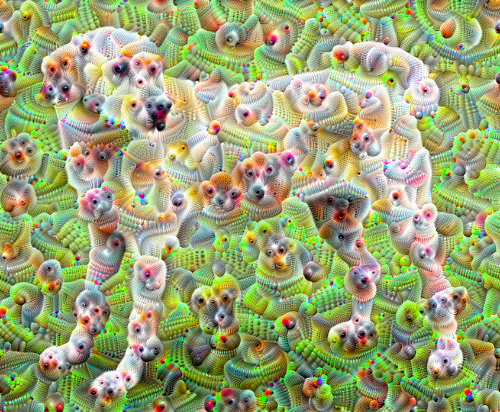


In [ ]:
import argparse

parser = argparse.ArgumentParser()
parser.add_argument("--input_image", type=str, default='/content/drive/MyDrive/CAU_mAI/boat.jpg', help="path to input image")
parser.add_argument("--iterations", default=20, help="number of gradient ascent steps per octave")
parser.add_argument("--at_layer", default=27, type=int, help="layer at which we modify image to maximize outputs")
parser.add_argument("--lr", default=0.01, help="learning rate")
parser.add_argument("--octave_scale", default=1.4, help="image scale between octaves")
parser.add_argument("--num_octaves", default=10, help="number of octaves")
args = parser.parse_args(list())

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import models
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import tqdm
import scipy.ndimage as nd

# Load image
image = Image.open(args.input_image)

# Define the model
network = models.vgg19(pretrained=True)
layers = list(network.features.children())
model = nn.Sequential(*layers[: (args.at_layer + 1)])
if torch.cuda.is_available:
    model = model.cuda()
print(network)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [ ]:
import numpy as np
import torch
from torchvision import transforms

mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

preprocess = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean, std)])


def deprocess(image_np):
    image_np = image_np.squeeze().transpose(1, 2, 0)
    image_np = image_np * std.reshape((1, 1, 3)) + mean.reshape((1, 1, 3))
    image_np = np.clip(image_np, 0.0, 255.0)
    return image_np


def clip(image_tensor):
    for c in range(3):
        m, s = mean[c], std[c]
        image_tensor[0, c] = torch.clamp(image_tensor[0, c], -m / s, (1 - m) / s)
    return image_tensor

In [ ]:
def dream(image, model, iterations, lr):
    """ Updates the image to maximize outputs for n iterations """
    Tensor = torch.cuda.FloatTensor if torch.cuda.is_available else torch.FloatTensor
    image = Variable(Tensor(image), requires_grad=True)
    for i in range(iterations):
        model.zero_grad()
        out = model(image)
        loss = out.norm()
        loss.backward()
        avg_grad = np.abs(image.grad.data.cpu().numpy()).mean()
        norm_lr = lr / avg_grad
        image.data += norm_lr * image.grad.data
        image.data = clip(image.data)
        image.grad.data.zero_()
    return image.cpu().data.numpy()

In [ ]:
image = preprocess(image).unsqueeze(0).cpu().data.numpy()

In [ ]:
 
# Extract image representations for each octave
octave_scale=args.octave_scale
num_octaves=args.num_octaves

octaves = [image]
for _ in range(num_octaves - 1):
    octaves.append(nd.zoom(octaves[-1], (1, 1, 1 / octave_scale, 1 / octave_scale), order=1))

lr=args.lr
iterations=args.iterations

detail = np.zeros_like(octaves[-1])
for octave, octave_base in enumerate(tqdm.tqdm(octaves[::-1], desc="Dreaming")):
    if octave > 0:
        # Upsample detail to new octave dimension
        detail = nd.zoom(detail, np.array(octave_base.shape) / np.array(detail.shape), order=1)
    # Add deep dream detail from previous octave to new base
    input_image = octave_base + detail
    input_check = octave_base + detail
    # Get new deep dream image
    dreamed_image = dream(input_image, model, iterations, lr)
    # Extract deep dream details
    detail = dreamed_image - octave_base

Dreaming: 100%|██████████| 10/10 [00:18<00:00,  1.89s/it]


In [ ]:
outputs = deprocess(dreamed_image)

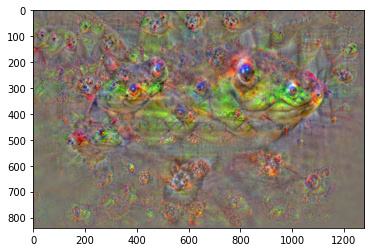

In [ ]:
plt.imshow(deprocess(detail))

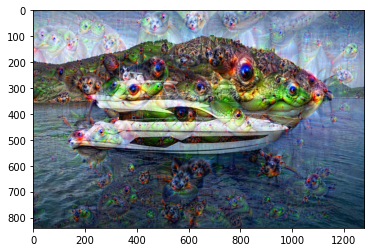

In [ ]:
plt.imshow(outputs)

In [ ]:
image2 = Image.open('/content/drive/MyDrive/CAU_mAI/cat.jpg')

In [ ]:
image2 = preprocess(image2).unsqueeze(0).cpu().data.numpy()

In [ ]:
# Extract image representations for each octave
octave_scale=args.octave_scale
num_octaves=args.num_octaves

octaves = [image2]
for _ in range(num_octaves - 1):
    octaves.append(nd.zoom(octaves[-1], (1, 1, 1 / octave_scale, 1 / octave_scale), order=1))

lr=args.lr
iterations=args.iterations

detail = np.zeros_like(octaves[-1])
for octave, octave_base in enumerate(tqdm.tqdm(octaves[::-1], desc="Dreaming")):
    if octave > 0:
        # Upsample detail to new octave dimension
        detail = nd.zoom(detail, np.array(octave_base.shape) / np.array(detail.shape), order=1)
    # Add deep dream detail from previous octave to new base
    input_image = octave_base + detail
    input_check = octave_base + detail
    # Get new deep dream image
    dreamed_image = dream(input_image, model, iterations, lr)
    # Extract deep dream details
    detail = dreamed_image - octave_base

Dreaming: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s]


In [ ]:
outputs2 = deprocess(dreamed_image)

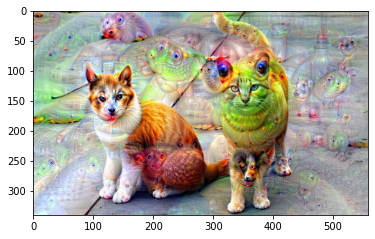

In [ ]:
plt.imshow(outputs2)

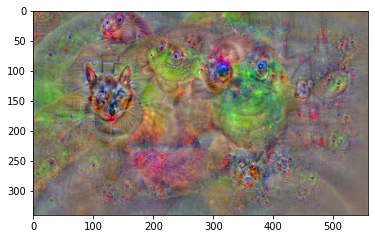

In [ ]:
plt.imshow(deprocess(detail))

#### Style Transfer
미지를 새로운 예술적 스타일로 재현할 수 있습니다. 이 알고리즘은 입력 이미지, Content 이미지, Style 이미지 3개의 이미지를 가져와서 Content 이미지의 Content와 Style 이미지의 예술적 Style을 닮도록 입력을 변환합니다.

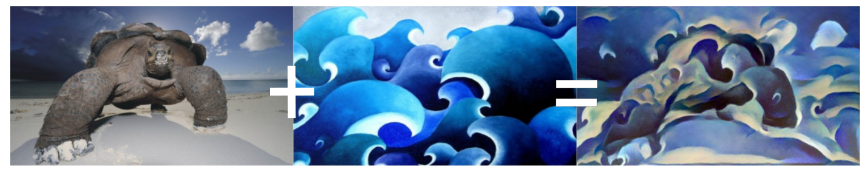

In [ ]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
import torchvision.models as models

import copy

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
imsize = 512 if torch.cuda.is_available() else 128  

loader = transforms.Compose([
    transforms.Resize(imsize),  # 가져온 이미지 크기 조정
    transforms.ToTensor()])  # 텐서로 변환


def image_loader(image_name):
    image = Image.open(image_name)
    # 네트워크의 입력 차원에 맞추기 위해 필요한 가짜 배치 차원
    image = loader(image).unsqueeze(0)
    return image.to(device, torch.float)


style_img = image_loader('/content/drive/MyDrive/CAU_mAI/picasso.jpg')
content_img = image_loader('/content/drive/MyDrive/CAU_mAI/dancing.jpg')

assert style_img.size() == content_img.size(), \
    "we need to import style and content images of the same size"

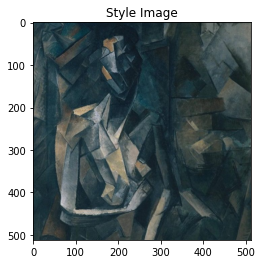

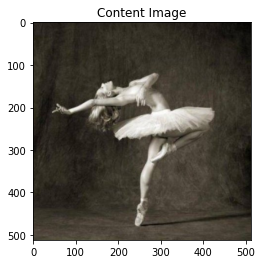

In [ ]:
unloader = transforms.ToPILImage()  # PIL 이미지로 다시 변환

plt.ion()

def imshow(tensor, title=None):
    image = tensor.cpu().clone()  # 텐서를 복제하여 변경하지 않음
    image = image.squeeze(0)      # 가짜 배치 차원 제거
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) # plots가 업데이트 되도록 잠시 멈춤


plt.figure()
imshow(style_img, title='Style Image')

plt.figure()
imshow(content_img, title='Content Image')

In [ ]:
class ContentLoss(nn.Module):

    def __init__(self, target,):
        super(ContentLoss, self).__init__()
        self.target = target.detach()

    def forward(self, input):
        self.loss = F.mse_loss(input, self.target)
        return input

In [ ]:
def gram_matrix(input):
    a, b, c, d = input.size()  # a=배치 크기(=1)
    # b=특징 맵의 수
    # (c,d)=특징 맵의 차원 (N=c*d)

    features = input.view(a * b, c * d)  # F_XL을 \hat F_XL로 크기 조정

    G = torch.mm(features, features.t())  # gram product를 계산

    # 각 특징 맵이 갖는 값의 수로 나누어
    # gram 행렬의 값을 '정규화'
    return G.div(a * b * c * d)
    
class StyleLoss(nn.Module):

    def __init__(self, target_feature):
        super(StyleLoss, self).__init__()
        self.target = gram_matrix(target_feature).detach()

    def forward(self, input):
        G = gram_matrix(input)
        self.loss = F.mse_loss(G, self.target)
        return input

In [ ]:
cnn = models.vgg19(pretrained=True).features.to(device).eval()

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)

# 입력 이미지를 정규화하는 모듈을 생성하여 쉽게 nn.Sequential에 넣을 수 있습니다.
class Normalization(nn.Module):
    def __init__(self, mean, std):
        super(Normalization, self).__init__()
        
        self.mean = torch.tensor(mean).view(-1, 1, 1)
        self.std = torch.tensor(std).view(-1, 1, 1)

    def forward(self, img):
        # img 정규화
        return (img - self.mean) / self.std

In [ ]:
# Style / Content 손실 계산을 원하는 계층
content_layers_default = ['conv_4']
style_layers_default = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']

def get_style_model_and_losses(cnn, normalization_mean, normalization_std,
                               style_img, content_img,
                               content_layers=content_layers_default,
                               style_layers=style_layers_default):
    # 모듈 정규화
    normalization = Normalization(normalization_mean, normalization_std).to(device)

    # Content / Style 손실이 반복적으로 접근할 수 있도록 하기 위해
    content_losses = []
    style_losses = []

    # cnn이 nn.Sequential이라고 가정하고,
    # 순차적으로 활성화되어야 하는 모듈에 새로운 nn.Sequential을 만듭니다.
    model = nn.Sequential(normalization)

    i = 0  # conv를 볼 때마다 증가
    for layer in cnn.children():
        if isinstance(layer, nn.Conv2d):
            i += 1
            name = 'conv_{}'.format(i)
        elif isinstance(layer, nn.ReLU):
            name = 'relu_{}'.format(i)
            # in-place 버전은 아래에 삽입한 Content 손실과 Style 손실와 잘 어울리지 않습니다.
            # 그래서 여기서는 out-of-place로 대체합니다.
            layer = nn.ReLU(inplace=False)
        elif isinstance(layer, nn.MaxPool2d):
            name = 'pool_{}'.format(i)
        elif isinstance(layer, nn.BatchNorm2d):
            name = 'bn_{}'.format(i)
        else:
            raise RuntimeError('Unrecognized layer: {}'.format(layer.__class__.__name__))

        model.add_module(name, layer)

        if name in content_layers:
            # Content 손실 추가
            target = model(content_img).detach()
            content_loss = ContentLoss(target)
            model.add_module("content_loss_{}".format(i), content_loss)
            content_losses.append(content_loss)

        if name in style_layers:
            # Style 손실 추가
            target_feature = model(style_img).detach()
            style_loss = StyleLoss(target_feature)
            model.add_module("style_loss_{}".format(i), style_loss)
            style_losses.append(style_loss)

    # 이제 마지막 Content 및 Style 손실 뒤에 계층을 잘라냅니다.
    for i in range(len(model) - 1, -1, -1):
        if isinstance(model[i], ContentLoss) or isinstance(model[i], StyleLoss):
            break

    model = model[:(i + 1)]

    return model, style_losses, content_losses

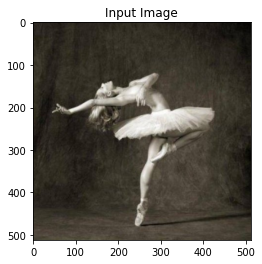

In [ ]:
input_img = content_img.clone()

# 그림에 원본 입력 이미지를 추가합니다.
plt.figure()
imshow(input_img, title='Input Image')

In [ ]:
def get_input_optimizer(input_img):

    optimizer = optim.LBFGS([input_img])
    return optimizer

In [ ]:
def run_style_transfer(cnn, normalization_mean, normalization_std,
                       content_img, style_img, input_img, num_steps=300,
                       style_weight=10000, content_weight=1):
    """Run the style transfer."""
    print('Building the style transfer model..')
    model, style_losses, content_losses = get_style_model_and_losses(cnn,
        normalization_mean, normalization_std, style_img, content_img)

    input_img.requires_grad_(True)
    model.requires_grad_(False)

    optimizer = get_input_optimizer(input_img)

    print('Optimizing..')
    run = [0]
    while run[0] <= num_steps:

        def closure():

            with torch.no_grad():
                input_img.clamp_(0, 1)

            optimizer.zero_grad()
            model(input_img)
            style_score = 0
            content_score = 0

            for sl in style_losses:
                style_score += sl.loss
            for cl in content_losses:
                content_score += cl.loss

            style_score *= style_weight
            content_score *= content_weight

            loss = style_score + content_score
            loss.backward()

            run[0] += 1
            if run[0] % 50 == 0:
                print("run {}:".format(run))
                print('Style Loss : {:4f} Content Loss: {:4f}'.format(
                    style_score.item(), content_score.item()))
                print()

            return style_score + content_score

        optimizer.step(closure)


    with torch.no_grad():
        input_img.clamp_(0, 1)

    return input_img

Building the style transfer model..
Optimizing..


<ipython-input-54-e16d6741e01b>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
<ipython-input-54-e16d6741e01b>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


run [50]:
Style Loss : 0.303692 Content Loss: 1.189072

run [100]:
Style Loss : 0.313426 Content Loss: 1.134266

run [150]:
Style Loss : 0.317798 Content Loss: 1.113625

run [200]:
Style Loss : 0.321018 Content Loss: 1.101439

run [250]:
Style Loss : 0.323734 Content Loss: 1.092862

run [300]:
Style Loss : 0.333574 Content Loss: 1.092711



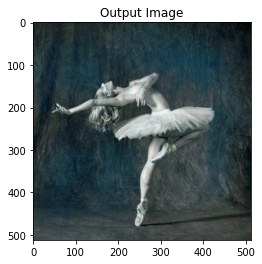

In [ ]:
output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img)

plt.figure()
imshow(output, title='Output Image')

# sphinx_gallery_thumbnail_number = 4
plt.ioff()
plt.show()

#### Class Activateion Map (CAM)
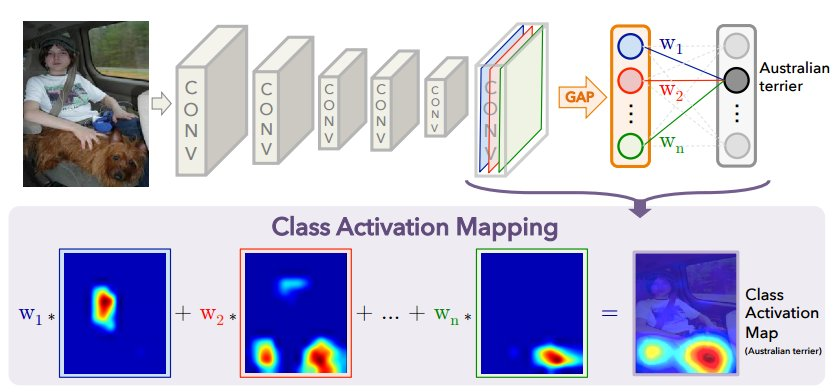

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.model_zoo as model_zoo


__all__ = ['Inception3', 'inception_v3']


model_urls = {
    # Inception v3 ported from TensorFlow
    'inception_v3_google': 'https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth',
}


def inception_v3(pretrained=False, **kwargs):
    r"""Inception v3 model architecture from
    `"Rethinking the Inception Architecture for Computer Vision" <http://arxiv.org/abs/1512.00567>`_.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    if pretrained:
        if 'transform_input' not in kwargs:
            kwargs['transform_input'] = True
        model = Inception3(**kwargs)
        model.load_state_dict(model_zoo.load_url(model_urls['inception_v3_google']))
        return model

    return Inception3(**kwargs)


class Inception3(nn.Module):

    def __init__(self, num_classes=1000, aux_logits=True, transform_input=False):
        super(Inception3, self).__init__()
        self.aux_logits = aux_logits
        self.transform_input = transform_input
        self.Conv2d_1a_3x3 = BasicConv2d(3, 32, kernel_size=3, stride=2)
        self.Conv2d_2a_3x3 = BasicConv2d(32, 32, kernel_size=3)
        self.Conv2d_2b_3x3 = BasicConv2d(32, 64, kernel_size=3, padding=1)
        self.Conv2d_3b_1x1 = BasicConv2d(64, 80, kernel_size=1)
        self.Conv2d_4a_3x3 = BasicConv2d(80, 192, kernel_size=3)
        self.Mixed_5b = InceptionA(192, pool_features=32)
        self.Mixed_5c = InceptionA(256, pool_features=64)
        self.Mixed_5d = InceptionA(288, pool_features=64)
        self.Mixed_6a = InceptionB(288)
        self.Mixed_6b = InceptionC(768, channels_7x7=128)
        self.Mixed_6c = InceptionC(768, channels_7x7=160)
        self.Mixed_6d = InceptionC(768, channels_7x7=160)
        self.Mixed_6e = InceptionC(768, channels_7x7=192)
        if aux_logits:
            self.AuxLogits = InceptionAux(768, num_classes)
        self.Mixed_7a = InceptionD(768)
        self.Mixed_7b = InceptionE(1280)
        self.Mixed_7c = InceptionE(2048)
        self.fc = nn.Linear(2048, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                import scipy.stats as stats
                stddev = m.stddev if hasattr(m, 'stddev') else 0.1
                X = stats.truncnorm(-2, 2, scale=stddev)
                values = torch.Tensor(X.rvs(m.weight.data.numel()))
                values = values.view(m.weight.data.size())
                m.weight.data.copy_(values)
            elif isinstance(m, nn.BatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()

    def forward(self, x):
        if self.transform_input:
            x = x.clone()
            x[:, 0] = x[:, 0] * (0.229 / 0.5) + (0.485 - 0.5) / 0.5
            x[:, 1] = x[:, 1] * (0.224 / 0.5) + (0.456 - 0.5) / 0.5
            x[:, 2] = x[:, 2] * (0.225 / 0.5) + (0.406 - 0.5) / 0.5
        # 299 x 299 x 3
        x = self.Conv2d_1a_3x3(x)
        # 149 x 149 x 32
        x = self.Conv2d_2a_3x3(x)
        # 147 x 147 x 32
        x = self.Conv2d_2b_3x3(x)
        # 147 x 147 x 64
        x = F.max_pool2d(x, kernel_size=3, stride=2)
        # 73 x 73 x 64
        x = self.Conv2d_3b_1x1(x)
        # 73 x 73 x 80
        x = self.Conv2d_4a_3x3(x)
        # 71 x 71 x 192
        x = F.max_pool2d(x, kernel_size=3, stride=2)
        # 35 x 35 x 192
        x = self.Mixed_5b(x)
        # 35 x 35 x 256
        x = self.Mixed_5c(x)
        # 35 x 35 x 288
        x = self.Mixed_5d(x)
        # 35 x 35 x 288
        x = self.Mixed_6a(x)
        # 17 x 17 x 768
        x = self.Mixed_6b(x)
        # 17 x 17 x 768
        x = self.Mixed_6c(x)
        # 17 x 17 x 768
        x = self.Mixed_6d(x)
        # 17 x 17 x 768
        x = self.Mixed_6e(x)
        # 17 x 17 x 768
        #if self.training and self.aux_logits:
        #    aux = self.AuxLogits(x)           # Error 12 -> 5
        # 17 x 17 x 768
        x = self.Mixed_7a(x)
        # 8 x 8 x 1280
        x = self.Mixed_7b(x)
        # 8 x 8 x 2048
        x = self.Mixed_7c(x)
        # 8 x 8 x 2048
        x = F.avg_pool2d(x, kernel_size=5)
        # 1 x 1 x 2048
        x = F.dropout(x, training=self.training)
        # 1 x 1 x 2048
        x = x.view(x.size(0), -1)
        # 2048
        x = self.fc(x)
        # 1000 (num_classes)
        #if self.training and self.aux_logits:
        #    return x, aux
        return x


class InceptionA(nn.Module):

    def __init__(self, in_channels, pool_features):
        super(InceptionA, self).__init__()
        self.branch1x1 = BasicConv2d(in_channels, 64, kernel_size=1)

        self.branch5x5_1 = BasicConv2d(in_channels, 48, kernel_size=1)
        self.branch5x5_2 = BasicConv2d(48, 64, kernel_size=5, padding=2)

        self.branch3x3dbl_1 = BasicConv2d(in_channels, 64, kernel_size=1)
        self.branch3x3dbl_2 = BasicConv2d(64, 96, kernel_size=3, padding=1)
        self.branch3x3dbl_3 = BasicConv2d(96, 96, kernel_size=3, padding=1)

        self.branch_pool = BasicConv2d(in_channels, pool_features, kernel_size=1)

    def forward(self, x):
        branch1x1 = self.branch1x1(x)

        branch5x5 = self.branch5x5_1(x)
        branch5x5 = self.branch5x5_2(branch5x5)

        branch3x3dbl = self.branch3x3dbl_1(x)
        branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
        branch3x3dbl = self.branch3x3dbl_3(branch3x3dbl)

        branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1)
        branch_pool = self.branch_pool(branch_pool)

        outputs = [branch1x1, branch5x5, branch3x3dbl, branch_pool]
        return torch.cat(outputs, 1)


class InceptionB(nn.Module):

    def __init__(self, in_channels):
        super(InceptionB, self).__init__()
        self.branch3x3 = BasicConv2d(in_channels, 384, kernel_size=3, stride=2)

        self.branch3x3dbl_1 = BasicConv2d(in_channels, 64, kernel_size=1)
        self.branch3x3dbl_2 = BasicConv2d(64, 96, kernel_size=3, padding=1)
        self.branch3x3dbl_3 = BasicConv2d(96, 96, kernel_size=3, stride=2)

    def forward(self, x):
        branch3x3 = self.branch3x3(x)

        branch3x3dbl = self.branch3x3dbl_1(x)
        branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
        branch3x3dbl = self.branch3x3dbl_3(branch3x3dbl)

        branch_pool = F.max_pool2d(x, kernel_size=3, stride=2)

        outputs = [branch3x3, branch3x3dbl, branch_pool]
        return torch.cat(outputs, 1)


class InceptionC(nn.Module):

    def __init__(self, in_channels, channels_7x7):
        super(InceptionC, self).__init__()
        self.branch1x1 = BasicConv2d(in_channels, 192, kernel_size=1)

        c7 = channels_7x7
        self.branch7x7_1 = BasicConv2d(in_channels, c7, kernel_size=1)
        self.branch7x7_2 = BasicConv2d(c7, c7, kernel_size=(1, 7), padding=(0, 3))
        self.branch7x7_3 = BasicConv2d(c7, 192, kernel_size=(7, 1), padding=(3, 0))

        self.branch7x7dbl_1 = BasicConv2d(in_channels, c7, kernel_size=1)
        self.branch7x7dbl_2 = BasicConv2d(c7, c7, kernel_size=(7, 1), padding=(3, 0))
        self.branch7x7dbl_3 = BasicConv2d(c7, c7, kernel_size=(1, 7), padding=(0, 3))
        self.branch7x7dbl_4 = BasicConv2d(c7, c7, kernel_size=(7, 1), padding=(3, 0))
        self.branch7x7dbl_5 = BasicConv2d(c7, 192, kernel_size=(1, 7), padding=(0, 3))

        self.branch_pool = BasicConv2d(in_channels, 192, kernel_size=1)

    def forward(self, x):
        branch1x1 = self.branch1x1(x)

        branch7x7 = self.branch7x7_1(x)
        branch7x7 = self.branch7x7_2(branch7x7)
        branch7x7 = self.branch7x7_3(branch7x7)

        branch7x7dbl = self.branch7x7dbl_1(x)
        branch7x7dbl = self.branch7x7dbl_2(branch7x7dbl)
        branch7x7dbl = self.branch7x7dbl_3(branch7x7dbl)
        branch7x7dbl = self.branch7x7dbl_4(branch7x7dbl)
        branch7x7dbl = self.branch7x7dbl_5(branch7x7dbl)

        branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1)
        branch_pool = self.branch_pool(branch_pool)

        outputs = [branch1x1, branch7x7, branch7x7dbl, branch_pool]
        return torch.cat(outputs, 1)


class InceptionD(nn.Module):

    def __init__(self, in_channels):
        super(InceptionD, self).__init__()
        self.branch3x3_1 = BasicConv2d(in_channels, 192, kernel_size=1)
        self.branch3x3_2 = BasicConv2d(192, 320, kernel_size=3, stride=2)

        self.branch7x7x3_1 = BasicConv2d(in_channels, 192, kernel_size=1)
        self.branch7x7x3_2 = BasicConv2d(192, 192, kernel_size=(1, 7), padding=(0, 3))
        self.branch7x7x3_3 = BasicConv2d(192, 192, kernel_size=(7, 1), padding=(3, 0))
        self.branch7x7x3_4 = BasicConv2d(192, 192, kernel_size=3, stride=2)

    def forward(self, x):
        branch3x3 = self.branch3x3_1(x)
        branch3x3 = self.branch3x3_2(branch3x3)

        branch7x7x3 = self.branch7x7x3_1(x)
        branch7x7x3 = self.branch7x7x3_2(branch7x7x3)
        branch7x7x3 = self.branch7x7x3_3(branch7x7x3)
        branch7x7x3 = self.branch7x7x3_4(branch7x7x3)

        branch_pool = F.max_pool2d(x, kernel_size=3, stride=2)
        outputs = [branch3x3, branch7x7x3, branch_pool]
        return torch.cat(outputs, 1)


class InceptionE(nn.Module):

    def __init__(self, in_channels):
        super(InceptionE, self).__init__()
        self.branch1x1 = BasicConv2d(in_channels, 320, kernel_size=1)

        self.branch3x3_1 = BasicConv2d(in_channels, 384, kernel_size=1)
        self.branch3x3_2a = BasicConv2d(384, 384, kernel_size=(1, 3), padding=(0, 1))
        self.branch3x3_2b = BasicConv2d(384, 384, kernel_size=(3, 1), padding=(1, 0))

        self.branch3x3dbl_1 = BasicConv2d(in_channels, 448, kernel_size=1)
        self.branch3x3dbl_2 = BasicConv2d(448, 384, kernel_size=3, padding=1)
        self.branch3x3dbl_3a = BasicConv2d(384, 384, kernel_size=(1, 3), padding=(0, 1))
        self.branch3x3dbl_3b = BasicConv2d(384, 384, kernel_size=(3, 1), padding=(1, 0))

        self.branch_pool = BasicConv2d(in_channels, 192, kernel_size=1)

    def forward(self, x):
        branch1x1 = self.branch1x1(x)

        branch3x3 = self.branch3x3_1(x)
        branch3x3 = [
            self.branch3x3_2a(branch3x3),
            self.branch3x3_2b(branch3x3),
        ]
        branch3x3 = torch.cat(branch3x3, 1)

        branch3x3dbl = self.branch3x3dbl_1(x)
        branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
        branch3x3dbl = [
            self.branch3x3dbl_3a(branch3x3dbl),
            self.branch3x3dbl_3b(branch3x3dbl),
        ]
        branch3x3dbl = torch.cat(branch3x3dbl, 1)

        branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1)
        branch_pool = self.branch_pool(branch_pool)

        outputs = [branch1x1, branch3x3, branch3x3dbl, branch_pool]
        return torch.cat(outputs, 1)


class InceptionAux(nn.Module):

    def __init__(self, in_channels, num_classes):
        super(InceptionAux, self).__init__()
        self.conv0 = BasicConv2d(in_channels, 128, kernel_size=1)
        self.conv1 = BasicConv2d(128, 768, kernel_size=5)
        self.conv1.stddev = 0.01
        self.fc = nn.Linear(768, num_classes)
        self.fc.stddev = 0.001

    def forward(self, x):
        # 17 x 17 x 768
        x = F.avg_pool2d(x, kernel_size=5, stride=3)
        # 5 x 5 x 768
        x = self.conv0(x)
        # 5 x 5 x 128
        x = self.conv1(x)
        # 1 x 1 x 768
        x = x.view(x.size(0), -1)
        # 768
        x = self.fc(x)
        # 1000
        return x


class BasicConv2d(nn.Module):

    def __init__(self, in_channels, out_channels, **kwargs):
        super(BasicConv2d, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, bias=False, **kwargs)
        self.bn = nn.BatchNorm2d(out_channels, eps=0.001)

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        return F.relu(x, inplace=True)

In [ ]:
import numpy as np
import io
import requests
from PIL import Image

def read_data(img_num, txt, idx):
    f = open(txt, 'r')
    IMG_URLs = []
    for i in range(img_num):
        line = f.readline()
        url = line.split()[idx]
        IMG_URLs = np.append(IMG_URLs,url)
    f.close()
    return IMG_URLs

def get_img(num, IMG_URL, root):
    response = requests.get(IMG_URL)
    img_pil = Image.open(io.BytesIO(response.content))
    #img_pil.save(str(idx) + '.jpg')
    img_pil.save(root + str(num) + '.jpg')
    return img_pil


In [ ]:
import torch, os
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


# functions
CAM             = 1
USE_CUDA        = 1
RESUME          = 0
PRETRAINED      = 0


# hyperparameters
BATCH_SIZE      = 32
IMG_SIZE        = 224
LEARNING_RATE   = 0.01
EPOCH           = 2

In [ ]:
# prepare data
normalize = transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
)

transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    normalize
])

transform_test = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize
])

In [ ]:
import torchvision

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

# class
classes = {0: 'plane', 1: 'car', 2: 'bird', 3: 'cat',
           4: 'deer', 5: 'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# fine tuning
if PRETRAINED:
    net = inception_v3(pretrained=PRETRAINED)
    for param in net.parameters():
        param.requires_grad = False
    net.fc = torch.nn.Linear(2048, 10)
else:
    net = inception_v3(pretrained=PRETRAINED, num_classes=len(classes))
final_conv = 'Mixed_7c'

net.cuda()

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [ ]:
def retrain(trainloader, model, use_cuda, epoch, criterion, optimizer):
    model.train()
    correct, total = 0, 0
    acc_sum, loss_sum = 0, 0
    i = 0
    for batch_idx, (data, target) in enumerate(trainloader):
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)

        # calculate accuracy
        correct += (torch.max(output, 1)[1].view(target.size()).data == target.data).sum()
        total += trainloader.batch_size
        train_acc = 100. * correct / total
        acc_sum += train_acc
        i += 1

        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        loss_sum += loss.item()

        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.3f}\tTraining Accuracy: {:.3f}%'.format(
                epoch, batch_idx * len(data), len(trainloader.dataset),
                100. * batch_idx / len(trainloader), loss.item(), train_acc))

    acc_avg = acc_sum / i
    loss_avg = loss_sum / len(trainloader.dataset)
    print()
    print('Train Epoch: {}\tAverage Loss: {:.3f}\tAverage Accuracy: {:.3f}%'.format(epoch, loss_avg, acc_avg))


def retest(testloader, model, use_cuda, criterion, epoch, RESUME):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in testloader:
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        # sum up batch loss
        test_loss += criterion(output, target).item()
        # get the index of the max log-probability
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(testloader.dataset)
    test_acc = 100. * correct / len(testloader.dataset)
    result = '\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.3f}%)\n'.format(
        test_loss, correct, len(testloader.dataset), test_acc)
    print(result)

    # Save checkpoint.
    if epoch % 10 == 0:
        torch.save(model.state_dict(), 'checkpoint/' + str(RESUME + int(epoch / 10)) + '.pt')


In [ ]:

# load checkpoint
if RESUME != 0:
    print("===> Resuming from checkpoint.")
    assert os.path.isfile('checkpoint/'+ str(RESUME) + '.pt'), 'Error: no checkpoint found!'
    net.load_state_dict(torch.load('checkpoint/' + str(RESUME) + '.pt'))


# retrain
criterion = torch.nn.CrossEntropyLoss()

if PRETRAINED:
    optimizer = torch.optim.SGD(net.fc.parameters(), lr=LEARNING_RATE, momentum=0.9, weight_decay=5e-4)
else:
    optimizer = torch.optim.SGD(net.parameters(), lr=LEARNING_RATE, momentum=0.9, weight_decay=5e-4)

for epoch in range (1, EPOCH + 1):
    retrain(trainloader, net, USE_CUDA, epoch, criterion, optimizer)
    retest(testloader, net, USE_CUDA, criterion, epoch, RESUME)

Train Epoch: 1 [0/50000 (0%)]	Loss: 3.633	Training Accuracy: 15.625%
Train Epoch: 1 [320/50000 (1%)]	Loss: 3.563	Training Accuracy: 10.511%
Train Epoch: 1 [640/50000 (1%)]	Loss: 4.752	Training Accuracy: 11.161%
Train Epoch: 1 [960/50000 (2%)]	Loss: 4.813	Training Accuracy: 11.694%
Train Epoch: 1 [1280/50000 (3%)]	Loss: 4.711	Training Accuracy: 12.119%
Train Epoch: 1 [1600/50000 (3%)]	Loss: 3.183	Training Accuracy: 12.316%
Train Epoch: 1 [1920/50000 (4%)]	Loss: 3.378	Training Accuracy: 12.295%
Train Epoch: 1 [2240/50000 (4%)]	Loss: 5.381	Training Accuracy: 12.324%
Train Epoch: 1 [2560/50000 (5%)]	Loss: 5.686	Training Accuracy: 12.500%
Train Epoch: 1 [2880/50000 (6%)]	Loss: 3.420	Training Accuracy: 12.569%
Train Epoch: 1 [3200/50000 (6%)]	Loss: 4.277	Training Accuracy: 12.778%
Train Epoch: 1 [3520/50000 (7%)]	Loss: 4.591	Training Accuracy: 13.063%
Train Epoch: 1 [3840/50000 (8%)]	Loss: 2.617	Training Accuracy: 13.249%
Train Epoch: 1 [4160/50000 (8%)]	Loss: 7.129	Training Accuracy: 13.740

FileNotFoundError: ignored

In [ ]:
# hook the feature extractor
features_blobs = []

def hook_feature(module, input, output):
    features_blobs.append(output.data.cpu().numpy())

net._modules.get(final_conv).register_forward_hook(hook_feature)


# CAM
if CAM:
    root = '/content/drive/MyDrive/CAU_mAI/cat.jpg'
    img = Image.open(root)
    # get_cam(net, features_blobs, img, classes, root)

1

In [ ]:
params = list(net.parameters())
weight_softmax = np.squeeze(params[-2].data.cpu().numpy())

normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    normalize
])

img_tensor = preprocess(img)
img_variable = Variable(img_tensor.unsqueeze(0)).cuda()
logit = net(img_variable)

In [ ]:
h_x = F.softmax(logit, dim=1).data.squeeze()
probs, idx = h_x.sort(0, True)

# output: the prediction
for i in range(0, 2):
    line = '{:.3f} -> {}'.format(probs[i], classes[idx[i].item()])
    print(line)

In [ ]:
import cv2
# generate class activation mapping for the top1 prediction
def returnCAM(feature_conv, weight_softmax, class_idx):
    # generate the class activation maps upsample to 256x256
    size_upsample = (256, 256)
    bz, nc, h, w = feature_conv.shape
    output_cam = []
    for idx in class_idx:
        cam = weight_softmax[class_idx].dot(feature_conv.reshape((nc, h*w)))
        cam = cam.reshape(h, w)
        cam = cam - np.min(cam)
        cam_img = cam / np.max(cam)
        cam_img = np.uint8(255 * cam_img)
        output_cam.append(cv2.resize(cam_img, size_upsample))
    return output_cam

In [ ]:
CAMs = returnCAM(features_blobs[0], weight_softmax, [idx[1].item()])

In [ ]:
print('output CAM.jpg for the top1 prediction: %s' % classes[idx[0].item()])
img = cv2.imread(root)
height, width, _ = img.shape
CAM = cv2.resize(CAMs[0], (width, height))
heatmap = cv2.applyColorMap(CAM, cv2.COLORMAP_JET)
result = heatmap * 0.5 + img * 0.5
# cv2.imwrite('cam.jpg', result)

In [ ]:
plt.imshow(result/255)